In [12]:
using Plots, Images
using Rotations, ImageTransformations, CoordinateTransformations, Interpolations
using nTomo, LaTeXStrings

In [3]:
function mat2gray_inv(img)
    m, M = extrema(img)
    return Gray.((M .- img)./(M-m))
end

function _rotimg(img::Matrix{T}, θ, c=Union{Real, Nothing}=nothing) where T<:AbstractFloat
    m, n = size(img)
    if c === nothing
        img_center = (m>>1, n>>1)
    else 
        img_center = (c[1], c[2])
    end
    θ = θ/180.0*π
    mv, Mv = extrema(img)
    timg = Gray.((img.-mv)/(Mv-mv))
    trfm = recenter(RotMatrix(θ), img_center)
    img1 = warp(timg, inv(trfm), method=BSpline(Linear()), fillvalue = Flat(), axes(timg))
    result = T.((img1[1:m, 1:n]).*(Mv-mv) .+ mv)
    return result
end

_rotimg (generic function with 2 methods)

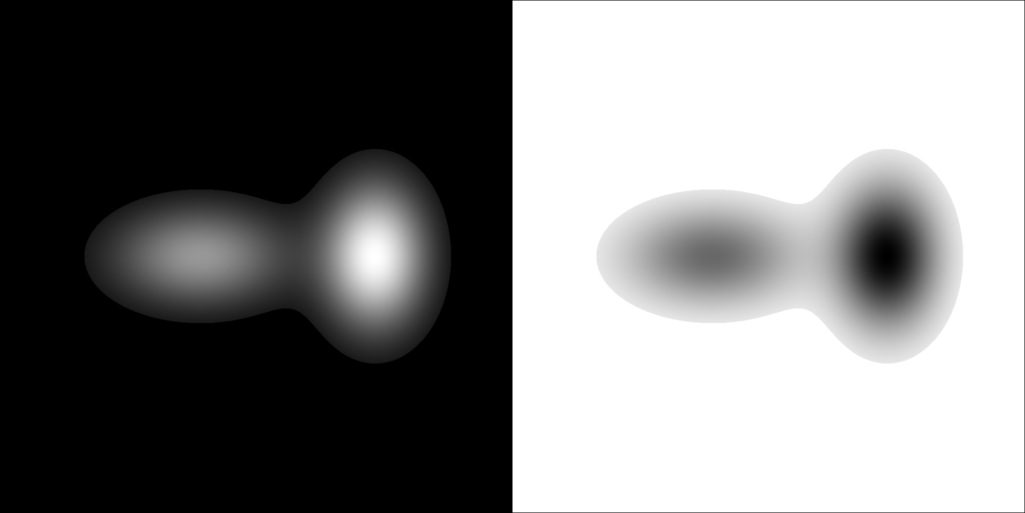

In [4]:
img = zeros((1024, 1024))

for I in CartesianIndices(img)
    y, x = Tuple(I)
    img[y, x] = 6.0*exp(-(x-400)^2/30000 - (y-512)^2/10000) 
    img[y, x] += 10.0*exp(-(x-750)^2/10000 - (y-512)^2/20000) 
end

img[img.<1.0] .= 0.0

q = mat2gray(img)
q_inv = mat2gray_inv(img)
# save("object.png", q)
# save("object_inv.png", q_inv)
[q q_inv]

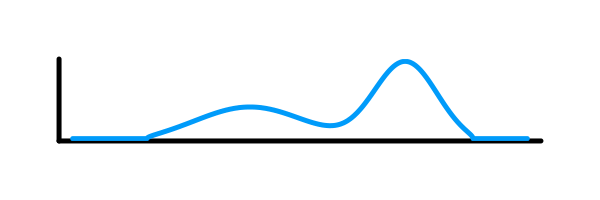

In [20]:
plot(sum(img, dims=1)[1,:], label = :none, xticks=[], yticks=[], background_color=:transparent,
thickness_scaling=5, size=(600, 200))
# savefig("radon1.png")

In [10]:
img2 = _rotimg(img, -45, (512, 512))
p2= mat2gray(img2)
# save("../images/rotated_object.png", p2)

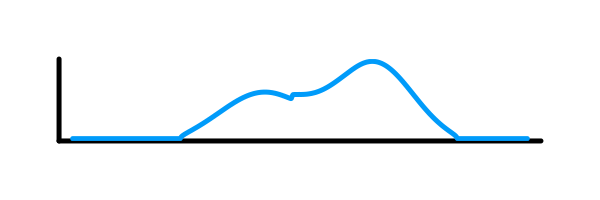

In [21]:
plot(sum(img2, dims=1)[1,:], label = :none, xticks=[], yticks=[], background_color=:transparent,
thickness_scaling=5,size=(600, 200) )

In [8]:
extrema(img)

(0.0, 10.102490714944084)

In [9]:
ths = 0:0.3:179.9
sinogram = radon(img, ths)

600×1024 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

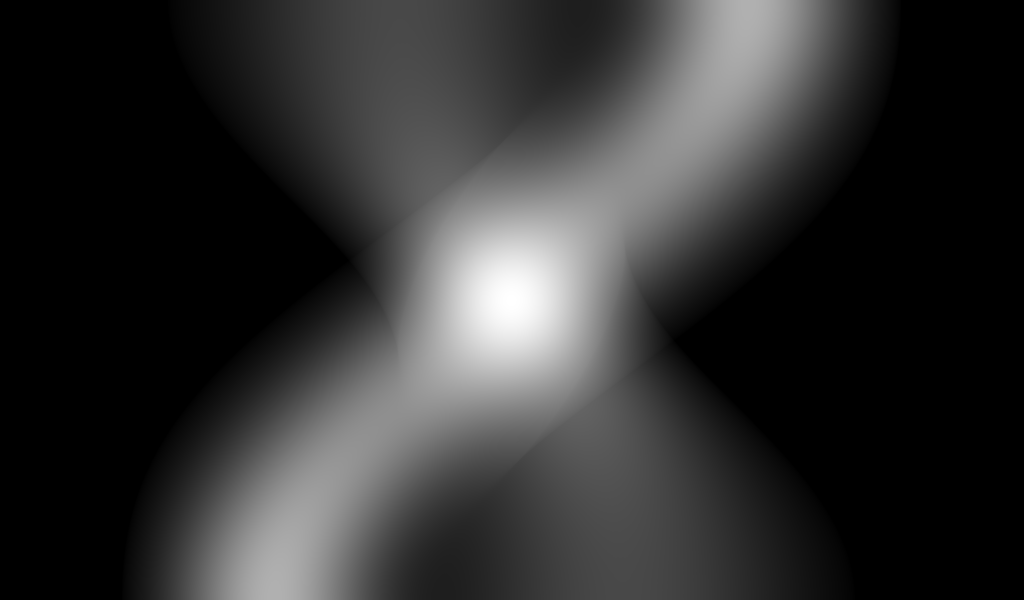

In [13]:
mat2gray(sinogram)

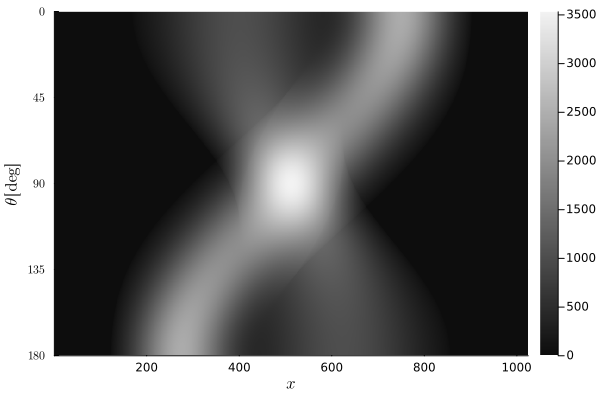

In [18]:
heatmap(sinogram, yflip=:true, xlabel = L"$x$", ylabel =L"\theta [\textrm{deg}]", c=:grays, yticks = ([0, 150, 300, 450, 600], [L"0", L"45", L"90", L"135", L"180"]))
# savefig("../images/object_sinogram.png")

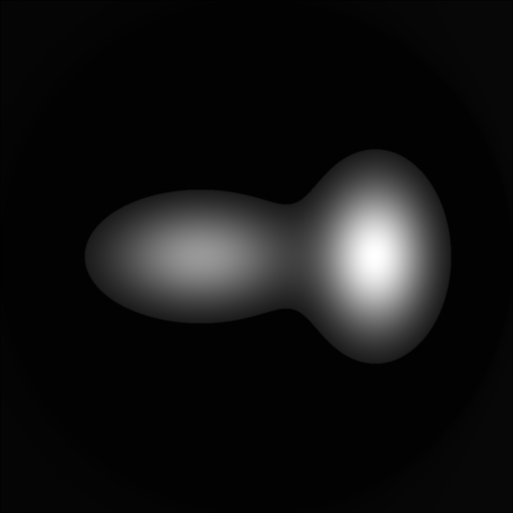

In [23]:
recimg = iradon_fbp(Float32.(sinogram), ths, 512)
mat2gray(recimg)

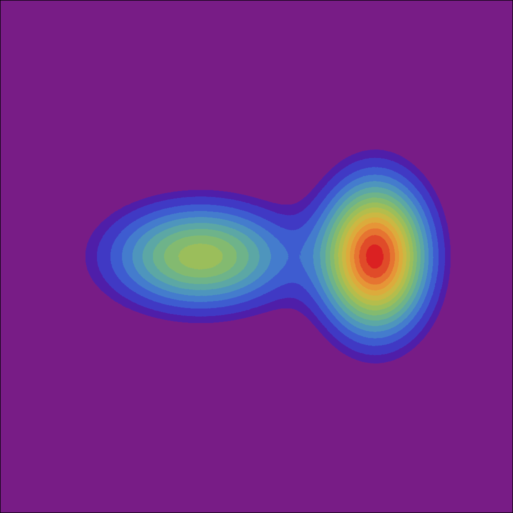

In [29]:
colorize(recimg, :rainbow)